### 설명:
#### 데이터셋 정보: Ames Housing 데이터셋은 2,930개의 예제와 80개의 특징으로 구성되어 있습니다. 그러나 복잡성을 줄이기 위해 이번 섹션에서는 아래에 나열된 일부 특징만 사용합니다.
#### 피처 정보:
#### Overall Qual: 집의 전반적인 재료와 마감에 대한 평가. 1(매우 나쁨)에서 10(훌륭함)까지의 척도.
#### Overall Cond: 집의 전반적인 상태에 대한 평가. 1(매우 나쁨)에서 10(훌륭함)까지의 척도.
#### Gr Liv Area: 지상(지면) 생활 영역의 제곱 피트 단위 면적.
#### Central Air: 중앙 에어컨 여부. N(없음), Y(있음).
#### Total Bsmt SF: 지하실 영역의 총 제곱 피트.
#### SalePrice: 미국 달러($)로 표시된 판매 가격.

#### 목표 변수: 이번 장에서는 판매 가격(SalePrice)을 우리의 목표 변수로 간주하며, 위의 다섯 개의 설명 변수 중 하나 이상을 사용하여 예측하려고 합니다.

In [1]:
import pandas as pd

# 사용할 컬럼들을 정의합니다.
columns = ['Overall Qual', 'Overall Cond', 'Gr Liv Area', 'Central Air', 'Total Bsmt SF', 'SalePrice']

# Ames Housing 데이터셋을 로드합니다. 이 데이터셋은 탭으로 구분되어 있으므로 sep='\t'를 사용합니다.
# usecols를 사용하여 필요한 컬럼만 선택합니다.
df = pd.read_csv('http://jse.amstat.org/v19n3/decock/AmesHousing.txt', sep='\t', usecols=columns)

# 데이터의 처음 5행을 출력합니다.
df.head()

,Overall Qual,Overall Cond,Total Bsmt SF,Central Air,Gr Liv Area,SalePrice
0,6,5,1080.0,Y,1656,215000
1,5,6,882.0,Y,896,105000
2,6,6,1329.0,Y,1329,172000
3,7,5,2110.0,Y,2110,244000
4,5,5,928.0,Y,1629,189900


==========================================================================================================
#### 데이터셋을 로드한 후에는 DataFrame의 차원을 확인하여 예상한 행 수가 포함되어 있는지 확인하는 것이 좋습니다.

In [2]:
df.shape

(2930, 6)

#### 이 코드는 DataFrame df의 차원을 반환합니다. 결과는 (행의 수, 열의 수) 형식의 튜플로 반환됩니다. 이를 통해 데이터셋에 몇 개의 예제(행)와 특징(열)이 포함되어 있는지 확인할 수 있습니다. Ames Housing 데이터셋의 경우, 예상되는 행의 수는 2,930개입니다.

==========================================================================================================
#### DataFrame에는 예상대로 2,930개의 행이 포함되어 있습니다.
#### 또한 처리해야 할 중요한 부분은 'Central Air' 변수입니다. 이 변수는 문자열로 인코딩되어 있습니다.
#### 4장에서 배웠듯이, 좋은 훈련 데이터셋 만들기 - 데이터 전처리에서, .map 메소드를 사용하여 DataFrame 컬럼을 변환할 수 있습니다.
#### 아래의 코드는 문자열 'Y'를 정수 1로, 문자열 'N'을 정수 0으로 변환합니다.

In [3]:
df['Central Air'] = df['Central Air'].map({'N': 0, 'Y': 1})

#### 이 코드는 'Central Air' 컬럼의 값을 매핑(mapping)하여 변환합니다. 여기서는 문자열 'Y'를 1로, 'N'을 0으로 변환합니다.
#### 이렇게 함으로써, 중앙 에어컨이 있는 집은 1로, 없는 집은 0으로 표시됩니다.
#### 이렇게 수치형으로 변환하면 머신러닝 모델에서 이 변수를 더 쉽게 처리할 수 있습니다.

==========================================================================================================

#### 마지막으로, DataFrame의 어느 컬럼에 누락된 값이 있는지 확인해봅시다.

In [4]:
df.isnull().sum()

Overall Qual     0
Overall Cond     0
Total Bsmt SF    1
Central Air      0
Gr Liv Area      0
SalePrice        0
dtype: int64

#### 위 코드는 DataFrame df의 각 컬럼에 누락된 값이 몇 개 있는지를 반환합니다.
#### df.isnull()은 DataFrame의 각 항목이 누락된 값인지 아닌지를 나타내는 Boolean DataFrame을 반환합니다.
(누락된 값에 대해서는 True, 그렇지 않으면 False).
#### .sum() 메서드는 각 컬럼의 True 값의 수를 합산하여 누락된 값의 수를 반환합니다.
#### 이를 통해 각 컬럼에서 누락된 값의 수를 알 수 있습니다. 이 정보는 데이터 전처리 단계에서 누락된 값을 어떻게 처리할지 결정하는 데 도움이 됩니다.

==========================================================================================================

#### DataFrame에서 누락된 값이 있는 행 제거하기
#### Total Bsmt SF 특징 변수에는 하나의 누락된 값이 있음을 확인할 수 있습니다. 우리가 가진 데이터셋이 상대적으로 크기 때문에,
#### 이 누락된 특징 값에 대한 가장 간단한 처리 방법은 해당 예제(행)를 데이터셋에서 제거하는 것입니다.
(다른 방법에 대해서는 4장을 참조해주세요.)

In [5]:
df = df.dropna(axis=0)
df.isnull().sum()

Overall Qual     0
Overall Cond     0
Total Bsmt SF    0
Central Air      0
Gr Liv Area      0
SalePrice        0
dtype: int64

#### df.dropna(axis=0)는 DataFrame에서 누락된 값이 있는 모든 행을 제거합니다.
#### 이후 df.isnull().sum()을 사용하여 각 컬럼에 누락된 값이 없는지 다시 확인합니다.

=========================================================================================================

### 데이터셋의 중요한 특성 시각화하기
#### 탐색적 데이터 분석(EDA)은 머신러닝 모델을 학습하기 전에 중요하고 권장되는 첫 번째 단계입니다.
#### 이 섹션에서는 이 데이터셋의 특징 간의 상관 관계를 한 눈에 볼 수 있는 산점도 행렬을 생성할 것입니다.
#### 이러한 시각화를 위해 mlxtend 라이브러리의 scatterplotmatrix 함수를 사용합니다.
#### mlxtend는 머신러닝과 데이터 과학 응용 프로그램을 위한 다양한 편의 함수를 포함하는 Python 라이브러리입니다.
#### mlxtend 패키지는 conda install mlxtend 또는 pip install mlxtend를 통해 설치할 수 있습니다.
#### 이 장에서는 mlxtend 버전 0.19.0을 사용하였습니다.
#### 설치가 완료되면, 아래와 같이 패키지를 가져와서 산점도 행렬을 생성할 수 있습니다.

In [6]:
# Anaconda prompt 에서 conda install mlxtend 후 kernel restart

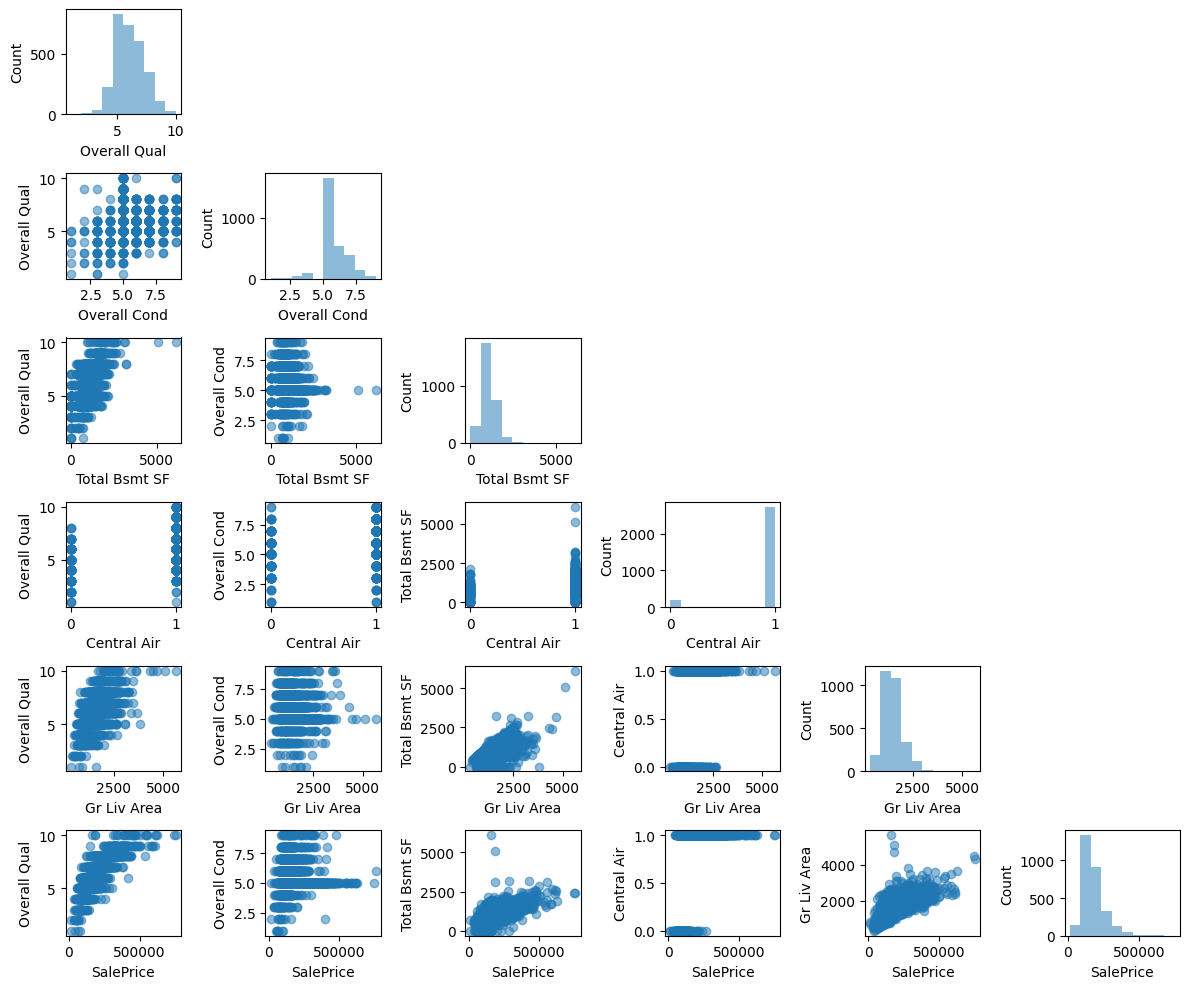

In [7]:
import matplotlib.pyplot as plt
import mlxtend
from mlxtend.plotting import scatterplotmatrix

scatterplotmatrix(df.values, figsize=(12, 10), names=df.columns, alpha=0.5)
plt.tight_layout()
plt.show()

#### 이 산점도 행렬을 사용하면 데이터가 어떻게 분포되어 있는지와 이상치가 있는지를 빠르게 확인할 수 있습니다.
#### 예를 들어, 산점도 행렬의 왼쪽에서 다섯 번째 컬럼의 가장 아래 행을 보면 지상 생활 영역의 크기(Gr Liv Area)와 판매 가격(SalePrice) 사이에 어느 정도 선형 관계가 있는 것을 확인할 수 있습니다.

==========================================================================================================

#### 다음 코드 예제에서는 이전에 산점도 행렬에서 시각화했던 다섯 개의 특징 열에 대해 NumPy의 corrcoef 함수를 사용할 것입니다.
#### 그리고 mlxtend의 heatmap 함수를 사용하여 상관 행렬 배열을 히트맵으로 그릴 것입니다.

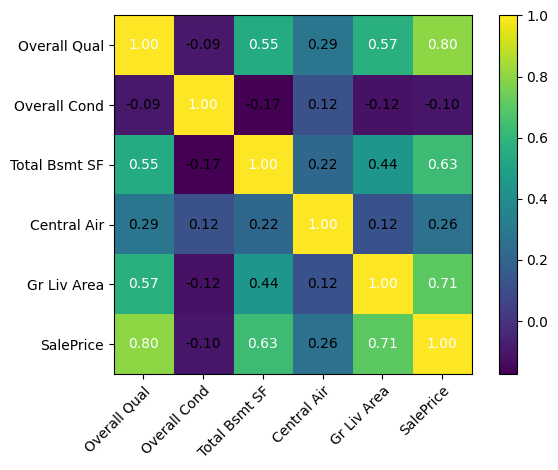

In [8]:
import numpy as np
from mlxtend.plotting import heatmap

# DataFrame의 값들에 대한 상관 행렬을 계산합니다.
cm = np.corrcoef(df.values.T)

# 상관 행렬을 히트맵으로 시각화합니다.
hm = heatmap(cm, row_names=df.columns, column_names=df.columns)

# 그래프의 레이아웃을 최적화합니다.
plt.tight_layout()

# 그래프를 화면에 표시합니다.
plt.show()

### 상관 행렬의 해석
#### 그림 9.5에서 볼 수 있듯이, 상관 행렬은 각각의 선형 상관관계를 기반으로 특징을 선택하는 데 도움이 되는 또 다른 유용한 요약 그래픽을 제공합니다.

##### 선형 회귀 모델을 적합시키기 위해, 우리는 목표 변수인 SalePrice와 높은 상관 관계를 가진 특징에 관심을 가집니다. 이전의 상관 행렬을 보면, SalePrice는 Gr Liv Area 변수와 가장 큰 상관관계(0.71)를 보입니다. 이는 다음 섹션에서 단순 선형 회귀 모델의 개념을 소개하기 위한 탐색 변수로 좋은 선택으로 보입니다.

 ==========================================================================================================

In [9]:
class LinearRegressionGD:
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta  # 학습률
        self.n_iter = n_iter  # 반복 횟수
        self.random_state = random_state  # 난수 생성기의 seed 값

    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])  # 가중치 초기화
        self.b_ = np.array([0.])  # 편향 초기화
        self.losses_ = []  # 각 반복에서의 손실을 저장하기 위한 리스트

        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)  # 예측 오차 계산
            self.w_ += self.eta * 2.0 * X.T.dot(errors) / X.shape[0]  # 가중치 업데이트
            self.b_ += self.eta * 2.0 * errors.mean()  # 편향 업데이트
            loss = (errors**2).mean()  # 손실 계산 (평균 제곱 오차)
            self.losses_.append(loss)  # 손실 저장
        return self

    def net_input(self, X):
        return np.dot(X, self.w_) + self.b_  # 내적 연산을 통한 넷 입력 계산

    def predict(self, X):
        return self.net_input(X)  # 예측 값 반환

#### 이 클래스는 선형 회귀 모델을 훈련시키고 예측을 수행하는 기능을 제공합니다.
#### fit 메서드는 주어진 학습 데이터에 모델을 훈련시키며, predict 메서드는 주어진 입력 데이터에 대한 예측 값을 반환합니다.

 ==========================================================================================================

#### 경사 하강법을 통한 가중치 업데이트
#### 가중치가 어떻게 업데이트되는지에 대한 설명이 필요하다면 -
#### 그래디언트의 반대 방향으로 한 걸음 나아가는 방법에 대해 - 2장의 '적응형 선형 뉴런과 학습의 수렴' 섹션을 다시 확인하시기 바랍니다.

#### LinearRegressionGD 회귀 분석기를 동작시켜 보기 위해 Ames 주택 데이터셋에서 'Gr Living Area'(지상 생활 공간의 크기, 제곱 피트 단위) 특징을 설명 변수로 사용하고 SalePrice를 예측하는 모델을 훈련시켜 보겠습니다.
#### 또한, GD 알고리즘의 더 나은 수렴을 위해 변수들을 표준화할 것입니다. 코드는 다음과 같습니다:

In [10]:
# 데이터에서 설명 변수와 목표 변수 추출
X = df[['Gr Liv Area']].values
y = df['SalePrice'].values

# 데이터 표준화를 위한 라이브러리 로드
from sklearn.preprocessing import StandardScaler

# 데이터 표준화
sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y[:, np.newaxis]).flatten()

# 경사 하강법을 사용한 선형 회귀 분석기 초기화 및 훈련
lr = LinearRegressionGD(eta=0.1)
lr.fit(X_std, y_std)

#### 이 코드는 'Gr Liv Area' 특징을 기반으로 주택의 판매 가격을 예측하는 선형 회귀 모델을 훈련시킵니다.

#### ==========================================================================================================

### 데이터 전처리 및 최적화 알고리즘 수렴 확인
#### y_std와 관련된 작업을 주목하세요. np.newaxis와 flatten을 사용했습니다.
#### scikit-learn의 대부분의 데이터 전처리 클래스들은 데이터가 이차원 배열에 저장되기를 기대합니다.
#### 이전 코드 예제에서, y[:, np.newaxis]에서 np.newaxis의 사용은 배열에 새로운 차원을 추가했습니다.
#### 그 후 StandardScaler가 스케일된 변수를 반환한 후, 우리의 편의를 위해 flatten() 메소드를 사용하여 원래의 일차원 배열 표현으로 다시 변환했습니다.
#### 2장에서 GD와 같은 최적화 알고리즘을 사용할 때 학습 데이터셋에 대한 전체 반복(에포크)의 함수로 손실을 그리는 것이 항상 좋은 생각이라고 언급했습니다. 알고리즘이 손실의 최소값(여기서는 전역 손실의 최소값)에 수렴했는지 확인하기 위해서입니다.

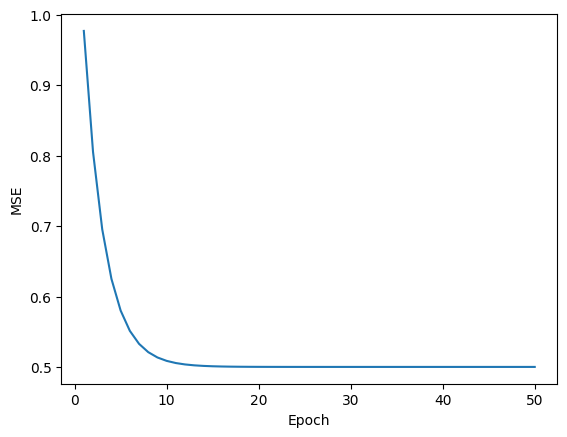

In [11]:
# 에포크에 따른 MSE 그래프 그리기
plt.plot(range(1, lr.n_iter+1), lr.losses_)
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.show()

#### 이 코드는 선형 회귀 모델이 학습 중에 평균 제곱 오차(MSE)가 어떻게 변하는지를 그래프로 나타냅니다.
#### 이를 통해 알고리즘이 잘 수렴하는지를 시각적으로 확인할 수 있습니다.

#### ==========================================================================================================

### 선형 회귀선 시각화
#### 다음으로, 선형 회귀선이 학습 데이터에 얼마나 잘 맞는지 시각화해 보겠습니다.
#### 이를 위해 학습 예제의 산점도를 그리고 회귀선을 추가하는 간단한 도우미 함수를 정의하겠습니다:

In [12]:
def lin_regplot(X, y, model):
    # 데이터 포인트 산점도 그리기
    plt.scatter(X, y, c='steelblue', edgecolor='white', s=70)
    # 회귀선 그리기
    plt.plot(X, model.predict(X), color='black', lw=2)

#### 이 lin_regplot 함수는 주어진 데이터와 선형 회귀 모델을 사용하여 산점도와 함께 선형 회귀선을 그립니다.

#### ==========================================================================================================

### 생활 공간과 판매 가격에 대한 선형 회귀선 시각화
#### 이제 이 lin_regplot 함수를 사용하여 지상 생활 공간에 대한 판매 가격을 그려보겠습니다:

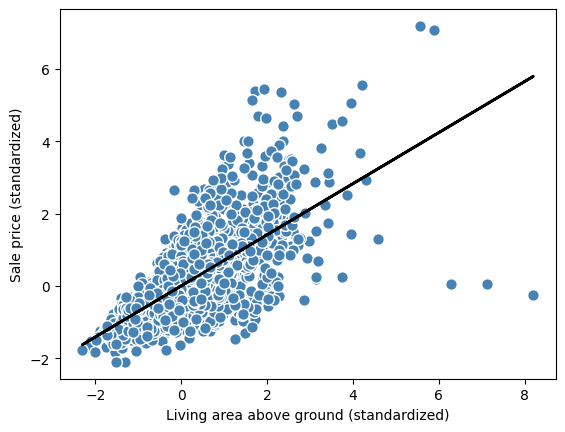

In [13]:
lin_regplot(X_std, y_std, lr)
plt.xlabel('Living area above ground (standardized)')
plt.ylabel('Sale price (standardized)')
plt.show()

### 데이터 해석 및 원래 스케일로의 예측 반환
#### 이러한 관찰은 의미가 있습니다. 그러나 데이터는 또한 많은 경우에 생활 공간 크기가 주택 가격을 매우 잘 설명하지 않는다는 것을 알려줍니다.
#### 이 장의 뒷부분에서 회귀 모델의 성능을 어떻게 정량화하는지에 대해 논의할 것입니다.
#### 흥미롭게도, 표준화된 생활 공간이 6보다 큰 세 개의 데이터 포인트에 해당하는 여러 이상치를 관찰할 수 있습니다.
#### 이 장에서 이상치를 어떻게 처리할 수 있는지에 대해 나중에 논의하겠습니다.
#### 특정 응용 프로그램에서는 예측된 결과 변수를 원래의 스케일로 보고하는 것도 중요할 수 있습니다.
#### 미국 달러로 원래의 가격에 예측된 가격을 다시 스케일링하려면, 단순히 StandardScaler의 inverse_transform 메서드를 적용하면 됩니다.

In [14]:
# 주어진 특징 값에 대한 예측 수행
feature_std = sc_x.transform(np.array([[2500]]))
target_std = lr.predict(feature_std)

# 예측값을 원래 스케일로 변환
target_reverted = sc_y.inverse_transform(target_std.reshape(-1, 1))
print(f'판매 가격: ${target_reverted.flatten()[0]:.2f}')

판매 가격: $292507.07


#### ==========================================================================================================

### 예측 및 모델 파라미터 확인
#### 이 코드 예제에서는 이전에 훈련된 선형 회귀 모델을 사용하여 지상 생활 공간이 2,500 제곱 피트인 주택의 가격을 예측했습니다.
#### 우리 모델에 따르면, 그러한 주택의 가격은 $292,507.07이 될 것입니다.
#### 부가적으로 언급할 만한 것은, 표준화된 변수로 작업할 때 기술적으로 절편 매개변수(예를 들면, 편향 단위, b)를 업데이트할 필요가 없다는 것입니다.
#### 그러한 경우 y축 절편은 항상 0이기 때문입니다. 우리는 모델 파라미터를 출력함으로써 이를 빠르게 확인할 수 있습니다.

In [15]:
# 모델의 경사와 절편 출력
print(f'기울기: {lr.w_[0]:.3f}')
print(f'절편: {lr.b_[0]:.3f}')

기울기: 0.707
절편: -0.000


#### ==========================================================================================================

### scikit-learn을 통한 회귀 모델 계수 추정
#### 이전 섹션에서는 회귀 분석을 위한 작동하는 모델을 구현했지만, 실제 응용 프로그램에서는 더 효율적인 구현에 관심이 있을 수 있습니다.
#### 예를 들어, scikit-learn의 회귀를 위한 많은 추정기들은 SciPy의 최소 제곱 구현(scipy.linalg.lstsq)을 사용하는데,
#### 이는 선형 대수 패키지(LAPACK)를 기반으로 한 고도로 최적화된 코드 최적화를 사용합니다.
#### scikit-learn의 선형 회귀 구현은 (S)GD 기반 최적화를 사용하지 않기 때문에 표준화 단계를 건너뛸 수 있어서 비표준화 변수와 함께 (더 잘) 작동합니다.

In [16]:
# scikit-learn의 선형 회귀 모델 사용
from sklearn.linear_model import LinearRegression

slr = LinearRegression()
slr.fit(X, y)
y_pred = slr.predict(X)

# 모델의 기울기와 절편 출력
print(f'기울기: {slr.coef_[0]:.3f}')
print(f'절편: {slr.intercept_:.3f}')

기울기: 111.666
절편: 13342.979


#### ==========================================================================================================

### scikit-learn의 LinearRegression 모델 결과 확인
#### 위의 코드를 실행하면 볼 수 있듯이, 표준화되지 않은 Gr Liv Area와 SalePrice 변수로 적합한 scikit-learn의 LinearRegression 모델은
#### 특성이 표준화되지 않았기 때문에 다른 모델 계수를 생성합니다.
#### 그러나 Gr Liv Area에 대한 SalePrice를 그려 GD 구현과 비교하면, 그것이 데이터에 마찬가지로 잘 맞는 것을 질적으로 볼 수 있습니다:

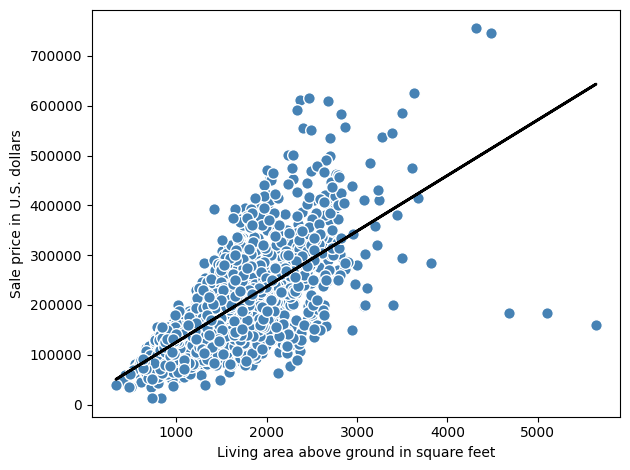

In [17]:
# scikit-learn의 선형 회귀 모델로 데이터와 회귀선 시각화
lin_regplot(X, y, slr)
plt.xlabel('Living area above ground in square feet')
plt.ylabel('Sale price in U.S. dollars')
plt.tight_layout()
plt.show()

#### ==========================================================================================================

### 선형 회귀의 분석적 해법
#### 머신 러닝 라이브러리를 사용하는 대신에, OLS를 해결하기 위한 닫힌 형태의 해법이 있습니다.
#### 이는 선형 방정식의 체계와 관련된 해법인데 대부분의 입문 통계 교재에서 찾을 수 있습니다:
#### 다음과 같이 Python에서 이를 구현할 수 있습니다:

In [18]:
# "ones"의 열 벡터 추가
Xb = np.hstack((np.ones((X.shape[0], 1)), X))
w = np.zeros(X.shape[1])
z = np.linalg.inv(np.dot(Xb.T, Xb))
w = np.dot(z, np.dot(Xb.T, y))

# 계산된 기울기와 절편 출력
print(f'기울기: {w[1]:.3f}')
print(f'절편: {w[0]:.3f}')

기울기: 111.666
절편: 13342.979


### 분석적 해법의 장점
#### 이 방법의 장점은 분석적으로 최적의 해를 찾는 것이 보장된다는 것입니다. 그러나 매우 큰 데이터셋을 사용할 경우,
#### 이 공식의 행렬을 역행렬로 변환하는 것은 계산적으로 매우 비싸거나, 훈련 예제를 포함하는 행렬이 특이 값(역행렬이 존재하지 않는)일 수 있기 때문에
#### 특정 경우에 반복적인 방법을 선호할 수 있습니다.
#### 만약 정규 방정식을 어떻게 얻는지에 대한 자세한 정보에 관심이 있다면, 레스터 대학교의 Dr. Stephen Pollock의 강의인 'The Classical Linear Regression Model' 장을 참조해보세요. 이는 이 링크에서 무료로 제공됩니다.
#### 또한, GD, SGD, 닫힌 형태의 해, QR 분해 및 특이 벡터 분해를 통해 얻은 선형 회귀 해법을 비교하려면 mlxtend의 LinearRegression 클래스를 사용하면 됩니다. 이는 이러한 옵션 사이에서 전환을 허용합니다. mlxtend 문서 링크
#### Python에서 회귀 모델링을 위한 또 다른 추천할만한 라이브러리는 statsmodels로, 여기에서 보여지는 것처럼 더 고급 선형 회귀 모델을 구현합니다.

#### ==========================================================================================================

### RANSAC을 사용하여 견고한 회귀 모델 적합
#### 선형 회귀 모델은 이상치의 영향을 크게 받을 수 있습니다.
#### 특정 상황에서는 데이터의 매우 작은 부분집합이 추정된 모델 계수에 큰 영향을 줄 수 있습니다.
#### 이상치를 탐지하기 위한 많은 통계적 테스트를 사용할 수 있지만, 이는 이 책의 범위를 벗어납니다.
#### 그러나 이상치를 제거하는 것은 항상 데이터 과학자로서의 우리의 판단과 도메인 지식을 필요로 합니다.

#### 이상치를 제거하는 대신에, 데이터의 부분 집합, 소위 이상치(inliers)에 회귀 모델을 적합시키는
#### RANdom SAmple Consensus (RANSAC) 알고리즘을 사용하는 견고한 회귀 방법을 살펴보겠습니다.

#### 반복적인 RANSAC 알고리즘을 다음과 같이 요약할 수 있습니다:

#### 1. 인라이어로 사용할 예제의 무작위 수를 선택하고 모델을 적합시킵니다.
#### 2. 모든 다른 데이터 점을 적합된 모델에 대해 테스트하고, 사용자가 주어진 허용 오차 내에 있는 점들을 인라이어에 추가합니다.
#### 3. 모든 인라이어를 사용하여 모델을 다시 적합시킵니다.
#### 4. 인라이어와 적합된 모델 간의 오차를 추정합니다.
#### 5. 성능이 특정 사용자 정의 임계값을 충족하거나 고정된 반복 횟수에 도달하면 알고리즘을 종료합니다. 그렇지 않으면 1단계로 돌아갑니다.
#### 이제 scikit-learn의 RANSACRegressor 클래스에 구현된 RANSAC 알고리즘과 함께 선형 모델을 사용해 보겠습니다:

In [19]:
from sklearn.linear_model import RANSACRegressor

ransac = RANSACRegressor(
    LinearRegression(),
    max_trials=100, # 기본값
    min_samples=0.95,
    residual_threshold=None, # 기본값
    random_state=123
)
ransac.fit(X, y)

RANSACRegressor(estimator=LinearRegression(), min_samples=0.95,
                random_state=123)

#### ==========================================================================================================

### RANSAC을 사용한 회귀 모델 적합시 이상치 처리
#### RANSACRegressor의 최대 반복 횟수를 100으로 설정하고, min_samples=0.95를 사용하여 무작위로 선택된 학습 예제의 최소 수를 데이터셋의 적어도 95퍼센트로 설정했습니다.

#### 기본적으로 (residual_threshold=None을 통해), scikit-learn은 인라이어 임계값을 선택하기 위해 MAD 추정치를 사용합니다. 여기서 MAD는 타겟 값, y의 중앙 절대 편차를 나타냅니다. 그러나 인라이어 임계값의 적절한 값 선택은 문제 특성에 따라 다르며, 이것은 RANSAC의 한 가지 단점입니다.

#### 최근 수년 동안 좋은 인라이어 임계값을 자동으로 선택하기 위한 많은 다양한 접근법이 개발되었습니다. 자세한 논의는 R. Toldo와 A. Fusiello의 "Automatic Estimation of the Inlier Threshold in Robust Multiple Structures Fitting"에서 찾을 수 있습니다.

#### RANSAC 모델을 적합시킨 후에는 적합된 RANSAC 선형 회귀 모델로부터 인라이어와 아웃라이어를 얻고, 선형 적합과 함께 그래프에 그릴 수 있습니다:

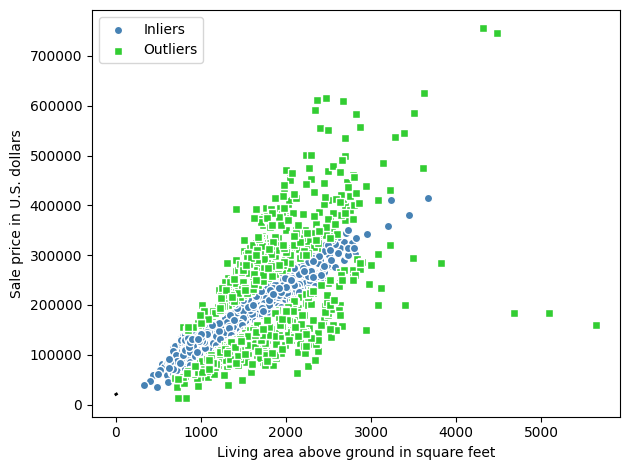

In [20]:
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)
line_X = np.arange(3, 10, 1)
line_y_ransac = ransac.predict(line_X[:, np.newaxis])
plt.scatter(X[inlier_mask], y[inlier_mask],
            c='steelblue', edgecolor='white',
            marker='o', label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask],
            c='limegreen', edgecolor='white',
            marker='s', label='Outliers')
plt.plot(line_X, line_y_ransac, color='black', lw=2)
plt.xlabel('Living area above ground in square feet')
plt.ylabel('Sale price in U.S. dollars')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

#### ==========================================================================================================

#### RANSAC을 사용하지 않고 이전 섹션에서 얻은 적합과 약간 다른 선형 회귀선을 얻게 됩니다.
#### 아래의 코드를 실행하여 모델의 기울기와 절편을 출력할 수 있습니다:

In [21]:
print(f'기울기: {ransac.estimator_.coef_[0]:.3f}')
print(f'절편: {ransac.estimator_.intercept_:.3f}')

기울기: 106.348
절편: 20190.093


#### RANSAC에서 residual_threshold 매개변수를 None으로 설정했기 때문에,
#### RANSAC은 이상치와 정상치를 플래그하기 위한 임계값을 계산하는 데 MAD를 사용했습니다.
#### 이 데이터셋에 대한 MAD는 다음과 같이 계산될 수 있습니다:

In [22]:
def mean_absolute_deviation(data):
    return np.mean(np.abs(data - np.mean(data)))

mean_absolute_deviation(y)

58269.561754979375

#### ==========================================================================================================

#### 따라서 우리가 이상치로 더 적은 데이터 포인트를 식별하려면 위에서 언급한 MAD보다 큰 residual_threshold 값을 선택할 수 있습니다.
#### 예를 들어, 그림 9.10은 잔차 임계값이 65,000인 RANSAC 선형 회귀 모델의 이상치와 정상치를 보여줍니다.

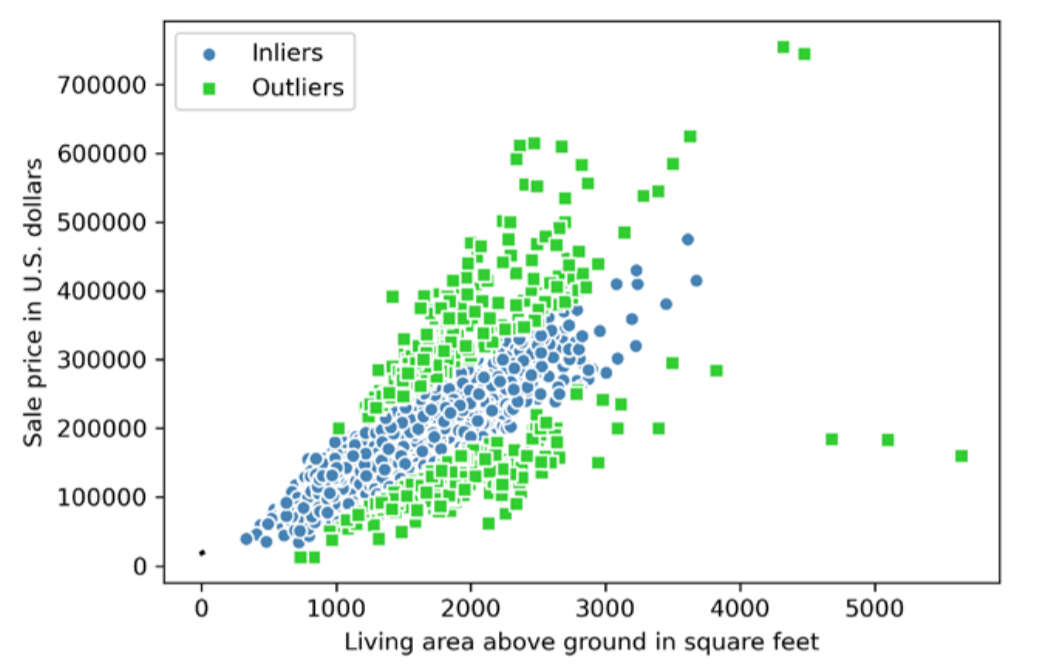

#### RANSAC을 사용하면 이 데이터셋에서 이상치의 잠재적인 영향을 줄일 수 있지만,
#### 이 접근법이 보이지 않는 데이터에 대한 예측 성능에 긍정적인 영향을 미칠지 여부는 알 수 없습니다.
#### 따라서 다음 섹션에서는 예측 모델링을 위한 시스템을 구축하는 데 있어 중요한 부분인 회귀 모델을 평가하는 다양한 접근법을 살펴볼 것입니다.

#### ==========================================================================================================

#### 이전 섹션에서는 학습 데이터에 회귀 모델을 적합시키는 방법을 배웠습니다.
#### 그러나 이전 장에서 배운 바와 같이 모델을 훈련 중에 보지 못한 데이터에서 모델을 테스트하는 것이 편향되지 않은 일반화 성능의 추정치를 얻기 위해 중요합니다.

#### 6장에서 배웠던 것처럼 데이터셋을 별도의 훈련 및 테스트 데이터셋으로 나누고자 합니다.
#### 여기서 전자를 사용하여 모델을 적합시키고 후자를 사용하여 보이지 않는 데이터에서의 성능을 평가하여 일반화 성능을 추정하려고 합니다. 간단한 회귀 모델로 진행하는 대신 이제 데이터셋의 모든 다섯 가지 특성을 사용하고 다중 회귀 모델을 훈련시킬 것입니다.

In [23]:
from sklearn.model_selection import train_test_split
target = 'SalePrice'
features = df.columns[df.columns != target]
X = df[features].values
y = df[target].values

In [24]:
# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=123)  # 테스트 세트의 크기는 전체 데이터의 30%로 설정

# 선형 회귀 모델 객체 생성
slr = LinearRegression()

# 훈련 데이터를 사용하여 선형 회귀 모델 학습
slr.fit(X_train, y_train)

# 훈련 데이터에 대한 예측값 계산
y_train_pred = slr.predict(X_train)

# 테스트 데이터에 대한 예측값 계산
y_test_pred = slr.predict(X_test)

#### ==========================================================================================================

#### 선형 회귀 모델이 여러 설명 변수를 사용할 때 이 변수들 간의 관계를 2차원 플롯에서 직접 시각화하는 것은 어렵습니다.
#### 그러나 잔차(실제 값과 예측값 간의 차이 또는 수직 거리)를 사용하여 예측값과 비교하여 모델을 진단할 수 있습니다.
#### 잔차 플롯은 회귀 모델을 진단하는 데 자주 사용되는 그래픽 도구입니다.
#### 이를 통해 데이터의 비선형성과 이상치를 탐지하고 오류가 무작위로 분포되어 있는지 확인할 수 있습니다.

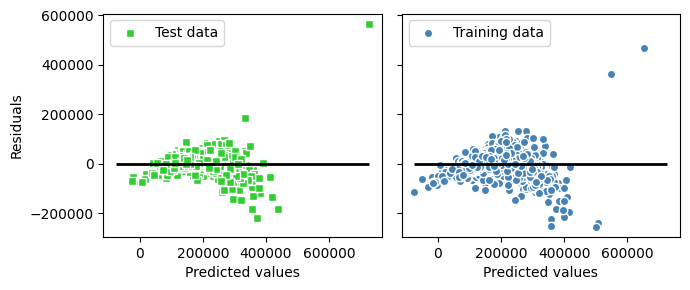

In [25]:
# 예측값 중에서 최댓값과 최솟값을 구함
x_max = np.max([np.max(y_train_pred), np.max(y_test_pred)])
x_min = np.min([np.min(y_train_pred), np.min(y_test_pred)])

# 그래프를 그리기 위한 subplot 설정
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7, 3), sharey=True)

# 테스트 데이터에 대한 잔차를 그래프로 표현
ax1.scatter(
    y_test_pred, y_test_pred - y_test,
    c='limegreen', marker='s',
    edgecolor='white',
    label='Test data'
)

# 훈련 데이터에 대한 잔차를 그래프로 표현
ax2.scatter(
    y_train_pred, y_train_pred - y_train,
    c='steelblue', marker='o', edgecolor='white',
    label='Training data'
)

# 각 그래프에 대한 y축 레이블 설정
ax1.set_ylabel('Residuals')

# 두 그래프에 공통적으로 x축 레이블, 범례 및 y=0의 수평선을 그림
for ax in (ax1, ax2):
    ax.set_xlabel('Predicted values')
    ax.legend(loc='upper left')
    ax.hlines(y=0, xmin=x_min-100, xmax=x_max+100, color='black', lw=2)

# 그래프 레이아웃을 조정하여 출력
plt.tight_layout()
plt.show()

#### ==========================================================================================================

#### 완벽한 예측의 경우 잔차는 정확히 0이 될 것이지만 현실적이고 실용적인 응용 프로그램에서 이런 상황을 접하게 될 가능성은 거의 없습니다.
#### 그러나 좋은 회귀 모델의 경우, 오류는 무작위로 분포되어 있어야 하며, 잔차는 중심선 주변에 무작위로 흩어져 있어야 합니다. 만약 잔차 그림에서 패턴을 발견한다면, 우리의 모델이 어떤 설명력 있는 정보를 포착하지 못하고 잔차로 유출되었음을 의미합니다. 이전의 잔차 그림에서도 어느 정도 이런 현상을 볼 수 있습니다. 또한 잔차 그림을 사용하여 중심선에서 크게 벗어난 점으로 이상치를 탐지할 수도 있습니다.

#### 모델의 성능을 정량적으로 측정하는 또 다른 유용한 지표는 이전에 손실 함수로서의 역할로 설명했던 평균 제곱 오차(MSE)입니다. 다음은 경사 하강법 미분 없이 MSE의 버전입니다:

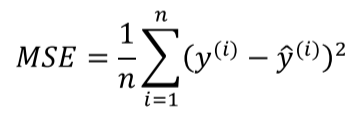

#### 분류 문맥에서의 예측 정확도와 마찬가지로, MSE도 교차 검증 및 모델 선택에 사용할 수 있습니다.

#### 분류 정확도와 마찬가지로 MSE도 표본 크기 n에 따라 정규화됩니다.
#### 이로 인해 학습 곡선의 맥락에서 다양한 표본 크기 간에 비교가 가능합니다. 이제 우리의 학습 및 테스트 예측에 대한 MSE를 계산해봅시다.

In [26]:
# sklearn에서 제공하는 mean_squared_error를 사용하여 MSE 계산
from sklearn.metrics import mean_squared_error

# 훈련 데이터와 테스트 데이터에 대한 MSE 계산
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# 훈련 데이터와 테스트 데이터의 MSE 출력
print(f'훈련 데이터 MSE: {mse_train:.2f}')

print(f'테스트 데이터 MSE: {mse_test:.2f}')


훈련 데이터 MSE: 1497216245.85
테스트 데이터 MSE: 1516565821.00


#### ==========================================================================================================

#### 훈련 데이터셋에서의 MSE가 테스트 세트보다 큰 것을 볼 수 있습니다.
#### 이는 우리의 모델이 이 경우에 훈련 데이터에 약간 과적합되어 있음을 나타내는 지표입니다.
#### 주의할 점은 오차를 원래의 단위 척도(여기서는 달러 대신 달러 제곱)로 보여주는 것이 더 직관적일 수 있다는 것입니다.
#### 그래서 MSE의 제곱근인 루트 평균 제곱 오차 또는 평균 절대 오차(MAE)를 계산할 수 있는데, 이는 잘못된 예측을 약간 덜 강조합니다:

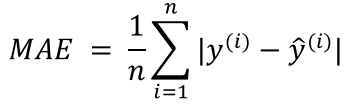

#### MSE와 마찬가지로 MAE도 계산할 수 있습니다:

In [27]:
# sklearn에서 제공하는 mean_absolute_error를 사용하여 MAE 계산
from sklearn.metrics import mean_absolute_error

# 훈련 데이터와 테스트 데이터에 대한 MAE 계산
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

# 훈련 데이터와 테스트 데이터의 MAE 출력
print(f'훈련 데이터 MAE: {mae_train:.2f}')

print(f'테스트 데이터 MAE: {mae_test:.2f}')

훈련 데이터 MAE: 25983.03
테스트 데이터 MAE: 24921.29


#### ==========================================================================================================

#### 모델 성능의 해석성을 높이기 위해 MSE의 표준화된 버전인 결정 계수(R²)를 보고하는 것이 때로는 더 유용할 수 있습니다.
#### 다르게 표현하면, R²는 모델이 포착하는 응답 분산의 분수입니다. R² 값은 다음과 같이 정의됩니다:

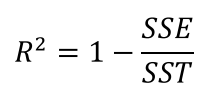

#### 여기서 SSE는 제곱 오차의 합으로, MSE와 유사하지만 표본 크기 n에 의한 정규화를 포함하지 않습니다:

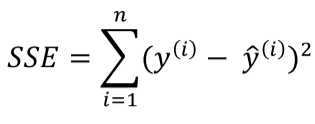

#### 그리고 SST는 총 제곱 합입니다:

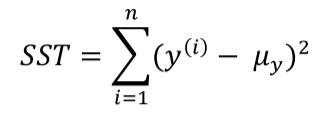

#### 다시 말해, SST는 response의 분산입니다.

#### 이제 R²가 실제로 MSE의 리스케일 버전임을 간략하게 보여줄 것입니다:

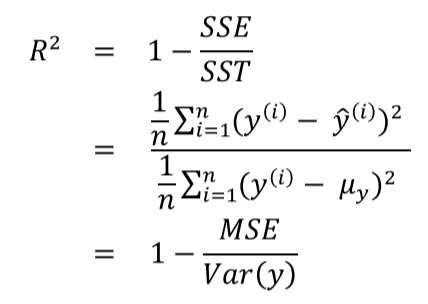

#### 훈련 데이터에 대해 평가했을 때, 우리 모델의 R-squared 값은 0.77입니다.
#### 이는 우리가 소수의 특징 집합만을 사용하고 있기 때문에 그다지 뛰어나진 않지만 나쁘지도 않습니다. 그러나 테스트 데이터셋에서의
#### R-squared 값은 조금만 작은 0.75로, 이는 모델이 약간 과적합되고 있다는 것을 나타냅니다.

#### 다음은 R-squared 값을 계산하기 위한 코드와 그 결과입니다:

In [28]:
# sklearn의 r2_score를 사용하여 R^2 값을 계산
from sklearn.metrics import r2_score

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# 훈련 데이터와 테스트 데이터의 R^2 값을 출력
print(f'R^2 train: {train_r2:.3f}, test: {test_r2:.3f}')

R^2 train: 0.769, test: 0.752


#### ==========================================================================================================

### 정규화 방법을 사용한 회귀
#### Chapter 3, Scikit-Learn을 사용한 기계 학습 분류기 투어에서 논의했듯이, 정규화는 과적합 문제를 해결하기 위한 접근 방법 중 하나입니다.
#### 이는 추가 정보를 추가하고 모델의 복잡성에 대한 패널티를 주기 위해 모델의 매개 변수 값을 축소함으로써 이루어집니다.
#### 정규화 선형 회귀에 가장 인기 있는 접근법은 소위 ridge 회귀, 최소 절대 축소 및 선택 연산자(LASSO), 그리고 elastic net입니다.

#### 릿지 회귀 모델은 다음과 같이 초기화할 수 있습니다:

In [29]:
# sklearn의 Ridge 모듈을 가져옵니다.
from sklearn.linear_model import Ridge
# alpha=1.0의 값을 가진 Ridge 회귀 모델 객체를 생성합니다.
ridge = Ridge(alpha=1.0)

#### 마찬가지로, linear_model 서브모듈로부터 LASSO 회귀를 초기화할 수 있습니다:

In [30]:
# sklearn의 Lasso 모듈을 가져옵니다.
from sklearn.linear_model import Lasso
# alpha=1.0의 값을 가진 Lasso 회귀 모델 객체를 생성합니다.
lasso = Lasso(alpha=1.0)


#### 마지막으로, ElasticNet 구현은 L1 대 L2 비율을 변화시키게 해줍니다:

In [31]:
# sklearn의 ElasticNet 모듈을 가져옵니다.
from sklearn.linear_model import ElasticNet
# alpha=1.0 및 l1_ratio=0.5의 값을 가진 ElasticNet 회귀 모델 객체를 생성합니다.
elanet = ElasticNet(alpha=1.0, l1_ratio=0.5)

#### 여기서 l1_ratio는 L1 페널티와 L2 페널티 사이의 비율을 지정합니다.
#### l1_ratio=1은 LASSO와 같고, l1_ratio=0은 Ridge 회귀와 같습니다.

#### ==========================================================================================================

### scikit-learn을 사용하여 다항 항 추가하기
#### 이제 scikit-learn의 PolynomialFeatures transformer 클래스를 사용하여 설명 변수 하나와 함께 간단한 회귀 문제에 2차항(d=2 )을 추가하는 방법을 배워보겠습니다.
#### 그런 다음 다음 단계를 따라 다항식을 선형적인 적합과 비교해 보겠습니다:

#### 1. 2차 다항 항을 추가합니다:

In [32]:
from sklearn.preprocessing import PolynomialFeatures

# 데이터 설정
X = np.array([ 258.0, 270.0, 294.0, 320.0, 342.0,
              368.0, 396.0, 446.0, 480.0, 586.0])[:, np.newaxis]
y = np.array([ 236.4, 234.4, 252.8, 298.6, 314.2,
              342.2, 360.8, 368.0, 391.2, 390.8])

# 선형 회귀와 다항 회귀 모델 초기화
lr = LinearRegression()
pr = LinearRegression()

# 2차 다항 항을 위한 변환기 생성
quadratic = PolynomialFeatures(degree=2)

# X 데이터를 2차 다항 형태로 변환
X_quad = quadratic.fit_transform(X)

#### 2. 선형 회귀 모델을 데이터에 적합시킵니다:

In [33]:
lr.fit(X, y)

# 예측을 위한 새로운 데이터 생성
X_fit = np.arange(250, 600, 10)[:, np.newaxis]

# 생성된 데이터에 대한 예측 수행
y_lin_fit = lr.predict(X_fit)

#### 3. 변환된 feature들에 대하여 다중 회귀 모델을 적합시킵니다:

In [34]:
pr.fit(X_quad, y)

# 예측을 위해 다항 특성으로 변환
y_quad_fit = pr.predict(quadratic.fit_transform(X_fit))

#### 결과를 그래프로 표현하기:
#### 다음 코드는 학습 데이터 포인트와 선형 및 2차 다항 적합을 그래프로 그립니다.

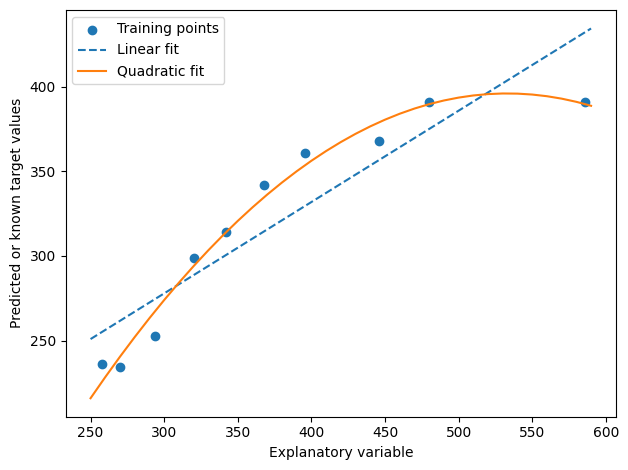

In [35]:
plt.scatter(X, y, label='Training points')
plt.plot(X_fit, y_lin_fit, label='Linear fit', linestyle='--')
plt.plot(X_fit, y_quad_fit, label='Quadratic fit')
plt.xlabel('Explanatory variable')
plt.ylabel('Predicted or known target values')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

#### 아래 코드는 선형 및 2차 다항 회귀 모델에 대한 학습 데이터의 MSE와 R-squared 값을 계산합니다.

In [36]:
# 예측값 계산
y_lin_pred = lr.predict(X)
y_quad_pred = pr.predict(X_quad)

# MSE 계산
mse_lin = mean_squared_error(y, y_lin_pred)
mse_quad = mean_squared_error(y, y_quad_pred)
print(f'학습 데이터의 선형 MSE: {mse_lin:.3f}, 2차 다항 MSE: {mse_quad:.3f}')

# R^2 계산
r2_lin = r2_score(y, y_lin_pred)
r2_quad = r2_score(y, y_quad_pred)
print(f'학습 데이터의 선형 R^2: {r2_lin:.3f}, 2차 다항 R^2: {r2_quad:.3f}')

학습 데이터의 선형 MSE: 569.780, 2차 다항 MSE: 61.330
학습 데이터의 선형 R^2: 0.832, 2차 다항 R^2: 0.982


#### 위의 결과를 해석하면, 2차 다항 회귀 모델이 선형 모델에 비해 훨씬 낮은 MSE 값을 가지며,
#### R-squared값이 더 높아서 데이터를 더 잘 설명한다는 것을 알 수 있습니다.

#### ==========================================================================================================

#### 이전 섹션에서는 토이 문제로 비선형 관계를 맞추기 위해 다항 특성을 구성하는 방법을 배웠습니다.
#### 이제 Ames 주택 데이터셋의 데이터에 이러한 개념을 적용하여 판매 가격과 지상 거실 면적 사이의 관계를 2차(이차) 및 3차(삼차) 다항식으로 모델링하고 선형 맞춤과 비교해 보겠습니다.

#### 우리는 이전의 그림들, 예를 들면 그림 9.8에서 볼 수 있듯이, 4000 제곱 피트 이상의 거실 면적을 가진 세 개의 이상치를 제거하여 이러한 이상치가 우리의 회귀 적합을 왜곡하지 않게 시작합니다.

In [37]:
X = df[['Gr Liv Area']].values
y = df['SalePrice'].values
X = X[(df['Gr Liv Area'] < 4000)]
y = y[(df['Gr Liv Area'] < 4000)]

#### ==========================================================================================================

#### 다음으로, 우리는 회귀 모델들을 적합시킵니다:

#### 먼저 선형, 이차 및 삼차 다항 특성을 준비하고 이를 이용하여 각각의 회귀 모델을 학습시킵니다.

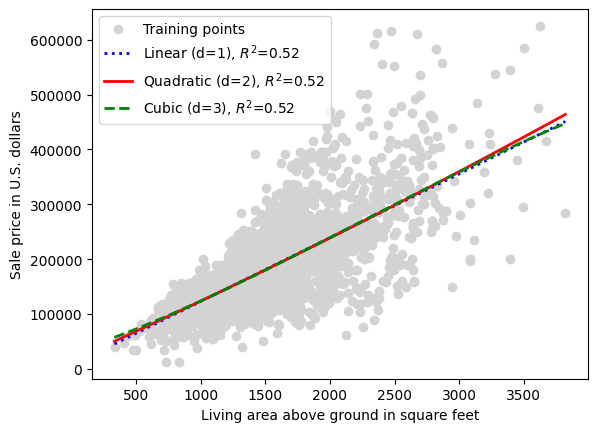

In [38]:
regr = LinearRegression()

# 2차와 3차 특성 생성
quadratic = PolynomialFeatures(degree=2)
cubic = PolynomialFeatures(degree=3)
X_quad = quadratic.fit_transform(X)
X_cubic = cubic.fit_transform(X)

# 특성에 맞게 학습
X_fit = np.arange(X.min()-1, X.max()+2, 1)[:, np.newaxis]
regr = regr.fit(X, y)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y, regr.predict(X))

regr = regr.fit(X_quad, y)
y_quad_fit = regr.predict(quadratic.fit_transform(X_fit))
quadratic_r2 = r2_score(y, regr.predict(X_quad))

regr = regr.fit(X_cubic, y)
y_cubic_fit = regr.predict(cubic.fit_transform(X_fit))
cubic_r2 = r2_score(y, regr.predict(X_cubic))

# 결과 표시
plt.scatter(X, y, label='Training points', color='lightgray')
plt.plot(X_fit, y_lin_fit, label=f'Linear (d=1), $R^2$={linear_r2:.2f}', color='blue', lw=2, linestyle=':')
plt.plot(X_fit, y_quad_fit, label=f'Quadratic (d=2), $R^2$={quadratic_r2:.2f}', color='red', lw=2, linestyle='-')
plt.plot(X_fit, y_cubic_fit, label=f'Cubic (d=3), $R^2$={cubic_r2:.2f}', color='green', lw=2, linestyle='--')
plt.xlabel('Living area above ground in square feet')
plt.ylabel('Sale price in U.S. dollars')
plt.legend(loc='upper left')
plt.show()

#### ==========================================================================================================

#### 우리가 볼 수 있듯이, 이차나 삼차 특성을 사용하는 것은 실제로 큰 효과가 없습니다.
#### 그 이유는 두 변수 사이의 관계가 선형적으로 보이기 때문입니다. 따라서 'Overall Qual'이라는 다른 특성을 살펴보겠습니다. '
#### Overall Qual' 변수는 주택의 재료와 마감의 전반적인 품질을 평가하며, 1에서 10까지의 척도로 제공되며, 10이 가장 좋습니다.

In [39]:
X = df[['Overall Qual']].values
y = df['SalePrice'].values

#### ==========================================================================================================

### Decision tree regression

#### 결정 트리 회귀의 맥락에서, MSE는 종종 노드 내 분산으로 언급되며, 이로 인해 분할 기준은 분산 감소로 더 잘 알려져 있습니다.
#### 결정 트리의 선적합이 어떻게 보이는지 확인하기 위해 scikit-learn에 구현된 DecisionTreeRegressor를 사용하여 SalePrice와 Gr Living Area 변수 간의 관계를 모델링해봅시다.
#### SalePrice와 Gr Living Area가 반드시 비선형 관계를 나타내지는 않지만, 이 특징 조합은 회귀 트리의 일반적인 측면을 아주 잘 보여줍니다:

In [40]:
from sklearn.tree import DecisionTreeRegressor
X = df[['Gr Liv Area']].values
y = df['SalePrice'].values
tree = DecisionTreeRegressor(max_depth=3)
tree.fit(X, y)

DecisionTreeRegressor(max_depth=3)

#### 이 코드는 SalePrice와 Gr Living Area 변수 간의 관계를 모델링하기 위해 결정 트리 회귀를 사용합니다.
#### 여기서 max_depth=3은 트리의 최대 깊이를 3으로 설정하여 트리의 복잡성을 제한합니다.

#### ==========================================================================================================

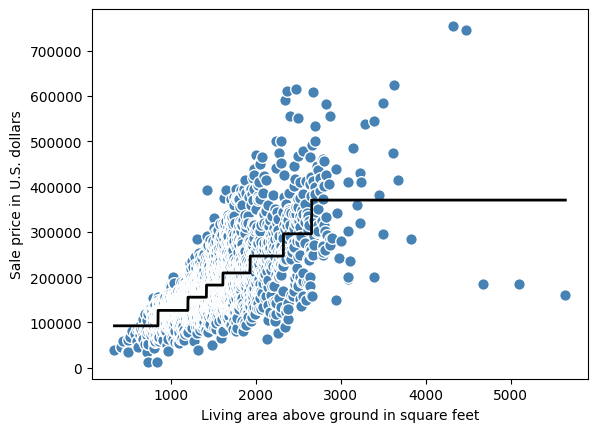

In [41]:
sort_idx = X.flatten().argsort()
lin_regplot(X[sort_idx], y[sort_idx], tree)
plt.xlabel('Living area above ground in square feet')
plt.ylabel('Sale price in U.S. dollars')
plt.show()

#### 더 깊은 결정 트리로 실험해보는 것을 권장합니다.
#### Gr Living Area와 SalePrice 간의 관계는 상당히 선형적이므로, 결정 트리를 Overall Qual 변수에 대해서도 적용해보는 것을 권장합니다.
#### 다음 섹션에서는 회귀 트리를 더 견고하게 적합시키는 방법인 랜덤 포레스트에 대해 살펴보겠습니다.

#### ==========================================================================================================

#### 이제 Ames 주택 데이터셋의 모든 특징을 사용하여 예제의 70%에 랜덤 포레스트 회귀 모델을 적합시키고 이전에
#### '선형 회귀 모델의 성능 평가' 섹션에서 했던 것처럼 나머지 30%에서 성능을 평가해봅시다.
#### 코드는 다음과 같습니다:

In [42]:
# 타겟 변수와 특성들을 지정합니다.
target = 'SalePrice'
features = df.columns[df.columns != target]

# 데이터를 입력 변수 X와 타겟 변수 y로 나눕니다.
X = df[features].values
y = df[target].values

# 데이터를 훈련 세트와 테스트 세트로 분할합니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

# 랜덤 포레스트 회귀 모델을 초기화합니다.
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators=1000, criterion='squared_error', random_state=1, n_jobs=-1)

# 훈련 데이터에 모델을 학습시킵니다.
forest.fit(X_train, y_train)

# 훈련 세트와 테스트 세트에서의 예측을 수행합니다.
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

# 훈련 세트와 테스트 세트에서의 MAE를 계산합니다.
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

# 훈련 세트와 테스트 세트의 MAE 결과를 출력합니다.
print(f'훈련 데이터의 MAE: {mae_train:.2f}')
print(f'테스트 데이터의 MAE: {mae_test:.2f}')

# 훈련 세트와 테스트 세트에서의 R^2를 계산합니다.
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# 훈련 세트와 테스트 세트의 R^2 결과를 출력합니다.
print(f'훈련 데이터의 R^2: {r2_train:.2f}')
print(f'테스트 데이터의 R^2: {r2_test:.2f}')

훈련 데이터의 MAE: 8305.18
테스트 데이터의 MAE: 20821.77
훈련 데이터의 R^2: 0.98
테스트 데이터의 R^2: 0.85


#### ==========================================================================================================


#### 마지막으로 예측의 잔차를 살펴보겠습니다:

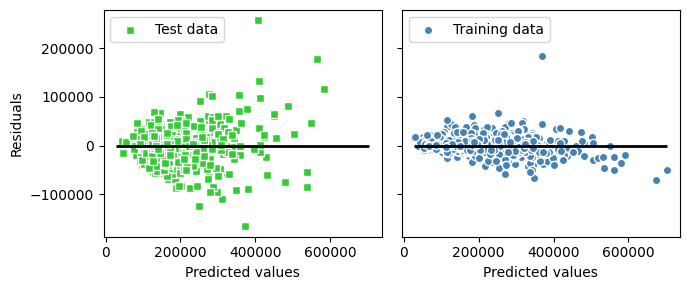

In [43]:
# 예측값의 최대 및 최소값을 계산합니다.
x_max = np.max([np.max(y_train_pred), np.max(y_test_pred)])
x_min = np.min([np.min(y_train_pred), np.min(y_test_pred)])

# 잔차를 시각화하기 위한 그래프를 준비합니다.
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7, 3), sharey=True)

# 테스트 데이터의 잔차를 그립니다.
ax1.scatter(y_test_pred, y_test_pred - y_test, c='limegreen', marker='s', edgecolor='white', label='Test data')

# 훈련 데이터의 잔차를 그립니다.
ax2.scatter(y_train_pred, y_train_pred - y_train, c='steelblue', marker='o', edgecolor='white', label='Training data')

# 레이블을 설정합니다.
ax1.set_ylabel('Residuals')
for ax in (ax1, ax2):
    ax.set_xlabel('Predicted values')
    ax.legend(loc='upper left')
    ax.hlines(y=0, xmin=x_min-100, xmax=x_max+100, color='black', lw=2)

# 그래프를 표시합니다.
plt.tight_layout()
plt.show()